# Problem Statement - I

## Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

**When a client applies for a loan, there are four types of decisions that could be taken by the client/company):**

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

**1. 'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

**2. 'previous_application.csv'** contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

**3. 'columns_description.csv'** is data dictionary which describes the meaning of the variables.

# Import Libraries:

Importing all the necesseary libraries required for this assignment:

* Pandas: For Dataframe purpose.
* Numpy: For algebric calculation purpose.
* Matplotlib and Seaborn : For Plotting purpose.

In [288]:
import pandas as pd #Dataframe Module
import numpy as np  # Algebric module
import matplotlib.pyplot as plt #Plotting module
# %%matplotlib inline #inline plotting
import seaborn as sns #plotting module

#Handles warnings

import warnings
warnings.filterwarnings('ignore')

In [289]:
pd.set_option('display.max_columns', 500) # This will display maximum 500 columns
pd.set_option('display.max_rows', 500) # This will display maximum 500 rows

# **APPLICATION DATA ANALYSIS**

# Data Mining and Understanding:

Read the required file and check the details present inside that using pandas module and its methods.

In [290]:
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [291]:
print(application_data.shape,'\n')
print(application_data.columns)

(307511, 122) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


**We can see that, there are nearly 307511 rows and 122 columns present in the Application Dataset.**

In [292]:
print(application_data.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None 



**info() will give the details about the variables present in the Dataframe. I am using describe() to get the statics calculations and style for design the output**

In [293]:
application_data.describe().style.set_properties(**{"background-color": "#FBEEE6","color":"#212F3D","border": "1.5px solid black"})

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

# Data Cleaning:

As I have studied in the content videos and live sessions, Its a very important part of EDA and ML Model building(which we will do later on of this course).

We need to work on missing values, Typo errors, Column names which are large make it readable, checking valid data avaiable or not etc.

**Checking null values present in each of the columns and calculating the percentage of it.**

In [294]:
null_percentage_column_wise = application_data.isnull().mean() * 100 
print(null_percentage_column_wise)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [295]:
#Sort the Percentage values
null_percentage_column_wise.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**First i calculated the mean value of the null value present in each column, then multiply with 100. So, it gave me the result of null value percentage of each column.** 

**Remove those columns which are having more than 40% null values**

In [296]:
higher_null_value_cols = null_percentage_column_wise[null_percentage_column_wise.values >=40.00].index.tolist()

In [297]:
null_percentage_column_wise[null_percentage_column_wise.values >=40.00].index.tolist()

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [298]:
null_percentage_column_wise[null_percentage_column_wise.values >=40.00]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [299]:
higher_null_value_cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

**Checked the values which are more than 40% and create a list of those columns.**

In [300]:
len(higher_null_value_cols)

49

**There are 49 columns which are having more 40% of null values. I can drop those columns now.**

In [301]:
application_data.drop(higher_null_value_cols, axis =1, inplace = True)

In [302]:
application_data.shape

(307511, 73)

In [303]:
application_data.isna().sum().sum()

412799

**As you can see, there are only 73 columns left in this dataframe now as we already removed the other 49% due to null value percentage issue.**

In [304]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [306]:
application_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

**Getting Categorical Columns**

All the **Object** Data types variable are comes under the Categorical Variable Columns.

In [307]:
print(application_data.select_dtypes(include='object').columns,'\n')
print('Total Column Size of Categorical Columns:',len(application_data.select_dtypes(include='object').columns))

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object') 

Total Column Size of Categorical Columns: 12


**Getting Numerical Columns**

In [308]:
print(application_data.select_dtypes(include=['int64', 'float64']).columns, '\n')
print('Total Column Size of Numerical Columns:',len(application_data.select_dtypes(include=['int64', 'float64']).columns))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

**From the above list as you can see there are still so many columns present which we don't need for analysis. I am going to make a list of those variables/columns and try to drop those columns from the dataframe.**

In [309]:
irrelevant_columns = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_columns

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [310]:
#So, now drop this list of columns from the main dataframe

application_data = application_data.drop(irrelevant_columns, axis = 1)


In [311]:
print(application_data.shape,'\n')
print(application_data.columns)

(307511, 54) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_1

**No of columns now are reduced to 54 now. Which is workable**

**Now checking the remaining missing values columns**

In [312]:
null_value_data = application_data.isnull().mean() * 100
print(null_value_data.sort_values(ascending = False))

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
AMT_CREDIT                      0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19

# Imputation Of Missing Values:

In [313]:
# Let's take column EXT_SOURCE_3 which is having 19.825307% of missing Value.

application_data['EXT_SOURCE_3'].isnull().mean()

0.19825307062186392

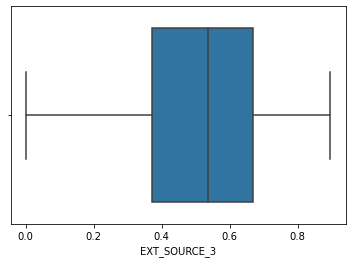

In [314]:
sns.boxplot(application_data["EXT_SOURCE_3"])
plt.show()

**As per the plot there is no outlier for this column**

In [315]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

**Mean = 0.510 and median = 0.535 which is not that much difference. If we will see the 25% and 75%, that also differed equally. We can impute the mean value of this column and also its a floating point column data type.**

In [316]:
EXT_SOURCE_3_mean = application_data['EXT_SOURCE_3'].mean()
EXT_SOURCE_3_mean

0.5108529061800121

In [317]:
application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].fillna(EXT_SOURCE_3_mean)

In [318]:
application_data['EXT_SOURCE_3'].isnull().sum()

0

**First i found out the mean value of the column and then fill all null values with the mean value**

**Similar way we can fill other columns null values with respect to their mean or median**<br>
**Let's take column EXT_SOURCE_2 which is having 0.214626% of missing Value.**


In [319]:
print(application_data['EXT_SOURCE_2'].isnull().mean(),'\n')
print(application_data['EXT_SOURCE_2'].describe())

0.0021462646864665006 

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


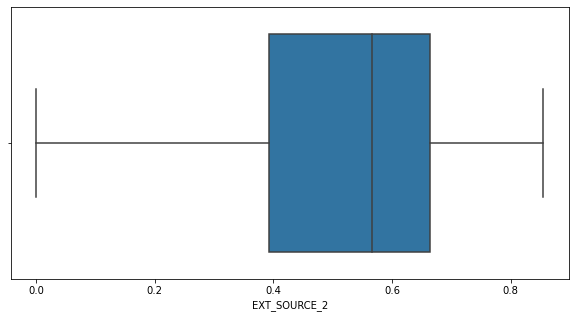

In [320]:
plt.figure(figsize = (10,5))
sns.boxplot(application_data["EXT_SOURCE_2"])
plt.show()

In [321]:
EXT_SOURCE_2_mean = application_data['EXT_SOURCE_2'].mean()
EXT_SOURCE_2_mean

0.5143926741308463

In [322]:
application_data['EXT_SOURCE_2'] = application_data['EXT_SOURCE_2'].fillna(EXT_SOURCE_2_mean)

In [323]:
application_data['EXT_SOURCE_2'].isnull().sum()

0

**Checking Column OCCUPATION_TYPE**

In [324]:
application_data.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [325]:
print(application_data.OCCUPATION_TYPE.value_counts(),'\n')

print(application_data.OCCUPATION_TYPE.mode()[0])

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

Laborers


In [326]:
application_data.OCCUPATION_TYPE.isnull().sum()

96391

**We can see that the mode of this column is coming as "Laborers" but you can see there that the null values are more than the "Laborers" count. So, let's keep the null value as it is.**

**Checking Column AMT_GOODS_PRICE**

In [327]:
application_data.AMT_GOODS_PRICE.isnull().mean()*100

0.09040327012692229

In [328]:
print(application_data['AMT_GOODS_PRICE'].describe(),'\n')
print(application_data['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p))

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64 

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object


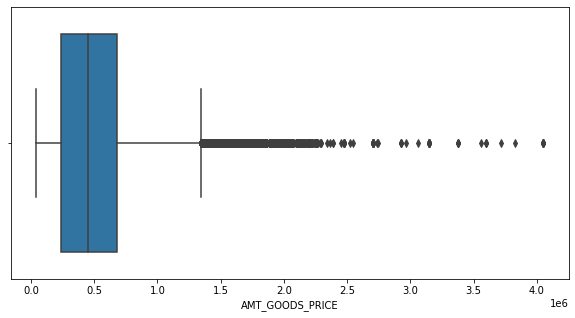

In [329]:
plt.figure(figsize = (10,5))
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

**As we can see there are some points above the upper bound those are outliers. We need to handle the outliers properly.**

* Standard deviation of AMT_GOODS_PRICE is very high. 
* Also there are good amount of outliers in the colum as well. 
* So, imputing missing values with mean or median will be biased in this case. 
* Hence, it is better to remove the rows with missing AMT_GOODS_PRICE. Infact these rows are only 0.09% of the whole records.

In [330]:
#Lets remove those 0.09 % of total rows for that columns.
application_data = application_data[~np.isnan(application_data['AMT_GOODS_PRICE'])]
application_data
# We can do this with drop method as well. 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-1982,Sales staff,1.0,1,1,0,0,Services,0.681632,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4090,NaN,1.0,2,2,0,0,XNA,0.115992,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-5150,Managers,1.0,3,3,0,0,School,0.535722,0.218859,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-931,Laborers,2.0,2,2,0,0,Business Entity Type 1,0.514163,0.661024,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Checking Column AMT_REQ_CREDIT_BUREAU_QRT**

In [331]:
print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().mean()*100, '\n')

print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.describe())

13.498875446322497 

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [332]:
print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts())

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


In [423]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

**As we can see this variable is a int type data type. And most widely used number is 0.0. Since they all are the no of credit enqueries, replacing the missing value with the most of the used value would be better option. So, we will take the mode of for this column.**

In [333]:
mode_data_AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
mode_data_AMT_REQ_CREDIT_BUREAU_QRT

0.0

In [334]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_QRT)

In [335]:
application_data.isnull().mean() *100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003906
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.355356
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_W

In [336]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
print(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_HOUR = application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_HOUR = application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_HOUR)

0.0    264135
1.0      1559
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64 



In [337]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().mean() *100 

0.0

In [338]:
print(application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_DAY = application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_DAY = application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_DAY )

0.0    264271
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64 



In [339]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().mean()*100

0.0

In [340]:
print(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_WEEK = application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_WEEK = application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_WEEK )

0.0    257228
1.0      8204
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64 



In [341]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().mean()*100

0.0

In [342]:
print(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_YEAR= application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_YEAR = application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_YEAR)

0.0     71733
1.0     63338
2.0     50143
3.0     33606
4.0     20702
5.0     12048
6.0      6961
7.0      3866
8.0      2126
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64 



In [343]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().mean()*100

0.0

In [344]:
print(application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_MON= application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_MON = application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_MON )

0.0     222022
1.0      33128
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        342
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64 



In [345]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().mean()

0.0

In [346]:
application_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [347]:
(application_data.isnull().mean()*100).sort_values(ascending = False).apply(lambda p: '%.2f' % p)

OCCUPATION_TYPE                31.36
AMT_ANNUITY                     0.00
SK_ID_CURR                      0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_13                0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_21                0.00
AMT_REQ_CREDIT_BUREAU_HOUR      0.00
AMT_REQ_CREDIT_BUREAU_DAY       0.00
AMT_REQ_CREDIT_BUREAU_WEEK      0.00
AMT_REQ_CREDIT_BUREAU_MON       0.00
AMT_REQ_CREDIT_BUREAU_QRT       0.00
F

**As we can see all the Null values are imputed except the OCCUPATION_TYPE and i have already explained in the above cell that we can't put the mode value of this column in the missing rows as the "Labour" counts are really less than the no of missing values.**

# Handling Errors in Columns:

In [348]:
Days_columns = application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']]
Days_columns.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-9461,-637,-2120
1,-16765,-1188,-291
2,-19046,-225,-2531
3,-19005,-3039,-2437
4,-19932,-3038,-3458


In the cells shown above 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH' which are having negative or mixed values, we need to work on thse variables.

**Days values can't be negative values. We have to convert them to absoulte values.**

In [349]:
application_data.DAYS_BIRTH = application_data.DAYS_BIRTH.abs()

In [350]:
application_data.DAYS_BIRTH 

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307233, dtype: int64

In [351]:
application_data.DAYS_EMPLOYED = application_data.DAYS_EMPLOYED.abs()
print(application_data.DAYS_EMPLOYED)

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307233, dtype: int64


In [352]:
application_data.DAYS_ID_PUBLISH = application_data.DAYS_ID_PUBLISH.abs()
print(application_data.DAYS_ID_PUBLISH)

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307233, dtype: int64


In [353]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**As we can see that 'DAYS_BIRTH' is in Days. to convert that to years we need to divide each rows values of this column by 365.**

In [354]:
application_data['Age'] = round(application_data.DAYS_BIRTH/365).astype('int')
print(application_data.Age)

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: Age, Length: 307233, dtype: int32


In [355]:
#We can drop the "DAYS_BIRTH" column now as we already handle that column as 'Age' column now.
application_data.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

In [356]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


# Handling Outliers: 

* 'AMT_INCOME_TOTAL'
* 'AMT_CREDIT'
* 'AMT_ANNUITY'
* 'AMT_GOODS_PRICE'
* 'AGE'

<function matplotlib.pyplot.show(close=None, block=None)>

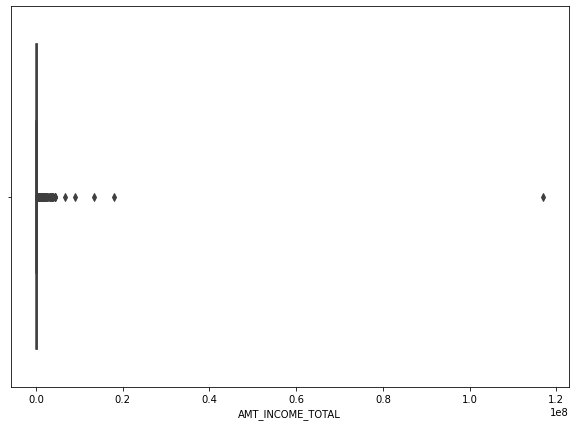

In [357]:
plt.figure(figsize = (10,7))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show

In [358]:
q1=application_data["AMT_INCOME_TOTAL"].describe()["25%"]
q3=application_data["AMT_INCOME_TOTAL"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]>upper_bound,upper_bound,application_data["AMT_INCOME_TOTAL"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

In [359]:
upper_bound

337500.0

In [360]:
application_data["AMT_INCOME_TOTAL"]

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307233, dtype: float64

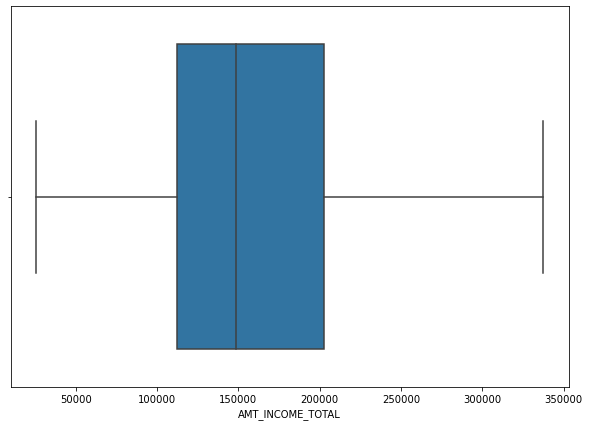

In [361]:
plt.figure(figsize = (10,7))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

**We can see now that the outliers are gone for the column AMT_INCOME_TOTAL**

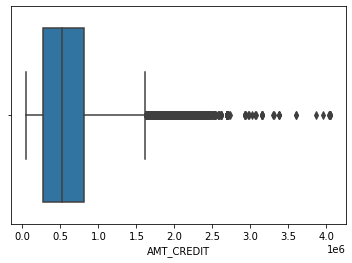

In [362]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

In [363]:
q1=application_data["AMT_CREDIT"].describe()["25%"]
q3=application_data["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_CREDIT"]=np.where(application_data["AMT_CREDIT"]>upper_bound,upper_bound,application_data["AMT_CREDIT"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

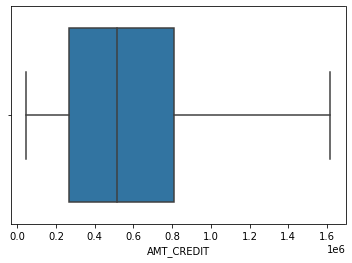

In [364]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

**After the adjustment now the upper bound outlier is gone for AMT_CREDIT column.**

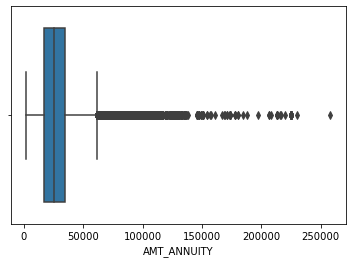

In [365]:
# AMT_ANNUITY'
# 'AMT_GOODS_PRICE'
# 'AGE'
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

In [424]:
application_data.AMT_ANNUITY.describe()


count    307221.000000
mean      27120.452357
std       14492.106811
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [426]:
application_data.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    24916.5
0.70    32017.5
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

**There no outlier here. No need for adjustment for this column.**

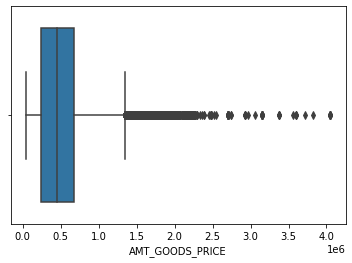

In [366]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [367]:
#Upper bound outliers are there. Need to work on those values.

q1=application_data["AMT_GOODS_PRICE"].describe()["25%"]
q3=application_data["AMT_GOODS_PRICE"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_GOODS_PRICE"]=np.where(application_data["AMT_GOODS_PRICE"]>upper_bound,upper_bound,application_data["AMT_GOODS_PRICE"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

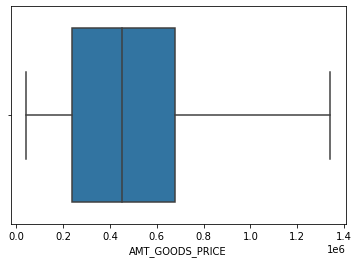

In [368]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

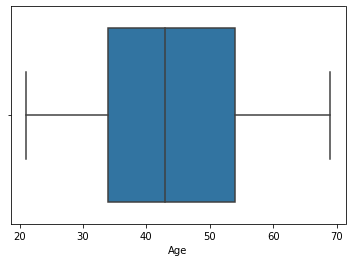

In [369]:
sns.boxplot(application_data.Age)
plt.show()

**Now outliers is managed and adjusted for the columns i had mentioned initially.**

In [370]:
application_data.CODE_GENDER.value_counts()

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [371]:
application_data.CODE_GENDER = application_data.CODE_GENDER.replace('XNA','F')

In [372]:
application_data.CODE_GENDER.value_counts()

F    202263
M    104970
Name: CODE_GENDER, dtype: int64

**In CODE_GENDER column there are some XNA value, i just replced the XNA with F because as i checked the no of females are way higher than the male.**

# Data Imbalance Checking

We can check the imbalance by using plotting method. I will use bar plots here to distinguise the values of the wanted variables/columns.

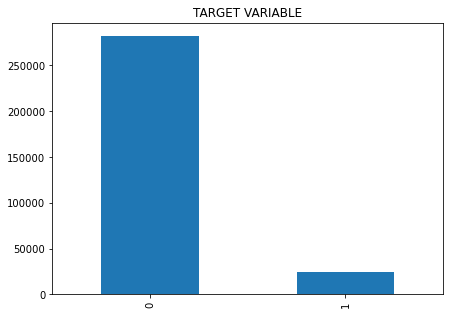

In [373]:
#Target variable
plt.figure(figsize=(7,5))
application_data.TARGET.value_counts().plot(kind = 'bar')
plt.title('TARGET VARIABLE')
plt.show()

In [374]:
print(application_data.TARGET.value_counts(normalize=True)*100)

0    91.926649
1     8.073351
Name: TARGET, dtype: float64


**As we know from the data dictionary, 1 mean defaulters and 0 mean not. Here, some defaulters are there. But the no of defaulter are very less compare to the non defaulters. Only 8.07% are Defaulters out of 100.**

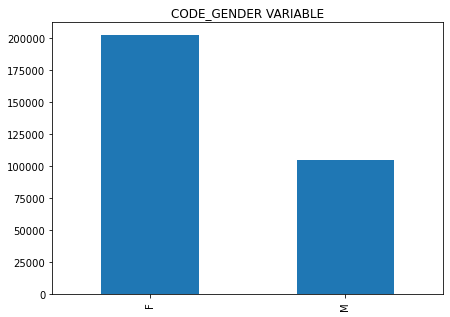

In [375]:
#CODE_GENDER variable
plt.figure(figsize=(7,5))
application_data.CODE_GENDER.value_counts().plot(kind = 'bar')
plt.title('CODE_GENDER VARIABLE')
plt.show()

In [376]:
print(application_data.CODE_GENDER.value_counts(normalize = True)*100)

F    65.833748
M    34.166252
Name: CODE_GENDER, dtype: float64


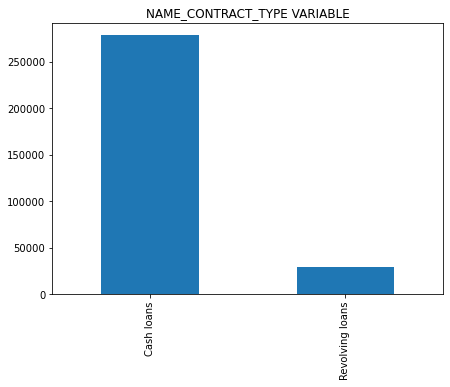

In [377]:
#NAME_CONTRACT_TYPE variable
plt.figure(figsize=(7,5))
application_data.NAME_CONTRACT_TYPE.value_counts().plot(kind = 'bar')
plt.title('NAME_CONTRACT_TYPE VARIABLE')
plt.show()

In [378]:
print(application_data.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100)

Cash loans         90.560584
Revolving loans     9.439416
Name: NAME_CONTRACT_TYPE, dtype: float64


**There are more cash loans than the Revolving Loans.**

Working                 51.618478
Commercial associate    23.295024
Pensioner               18.012063
State servant            7.056534
Unemployed               0.007161
Student                  0.005859
Businessman              0.003255
Maternity leave          0.001627
Name: NAME_INCOME_TYPE, dtype: float64 

Secondary / secondary special    71.018087
Higher education                 24.345692
Incomplete higher                 3.341763
Lower secondary                   1.241078
Academic degree                   0.053380
Name: NAME_EDUCATION_TYPE, dtype: float64 

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64 

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64 

Ho

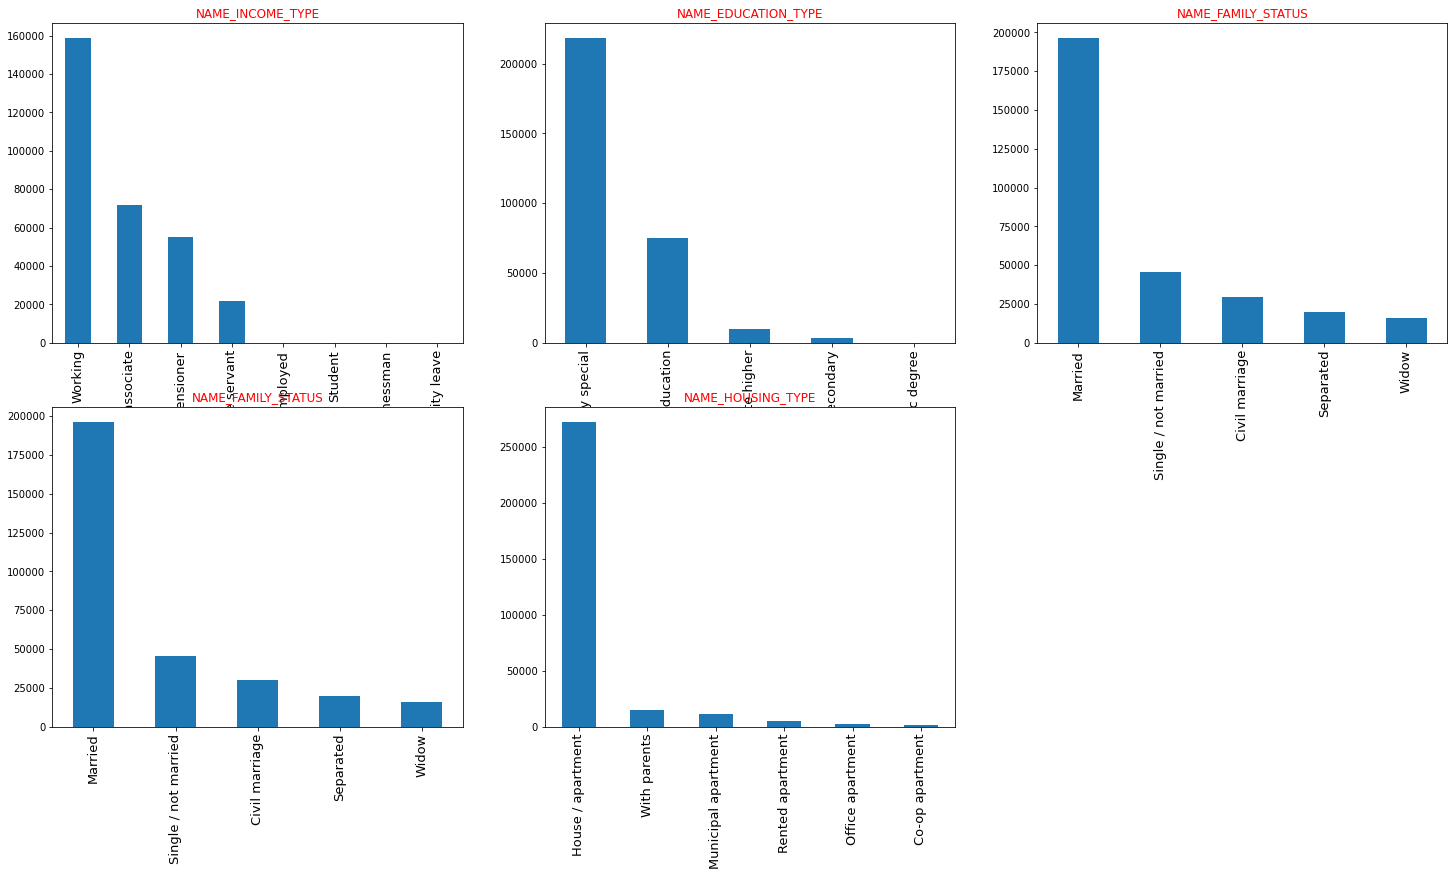

In [379]:
# We can try the list and loop method as well. 

variable_list = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
x = 0
plt.figure(figsize = (25,20))
for variable in variable_list:
    x += 1
    plt.subplot(3,3,x)
    plt.title(variable, color = 'red')
    application_data[variable].value_counts().plot(kind = 'bar')
    print(application_data[variable].value_counts(normalize=True)*100,"\n")
    plt.xticks(rotation= 90, fontsize = 13)


* **NAME_INCOME_TYPE:** Working, Commercial associate and Pensioner are the one with higher percentage of applicants.
* **NAME_EDUCATION_TYPE:** Most of the loan provided to Secondary or for Higher education purposes.
* **NAME_FAMILY_STATUS:** Most of the loan applicants are Married.
* **NAME_HOUSING_TYPE:** The applicants are staying mostly in their own house else in apratments.

# Graphical Analysis

In [380]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG

In [381]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

**There are still alot of columns present, lets see the FALG_DOCUMENT columns and anlyse them properly**

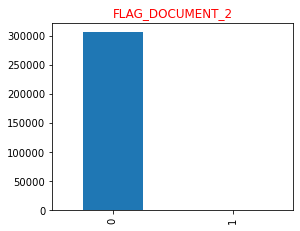

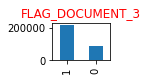

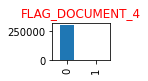

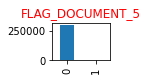

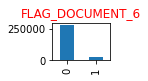

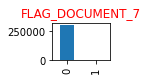

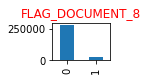

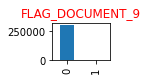

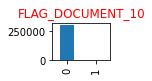

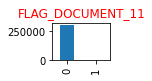

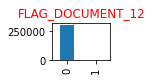

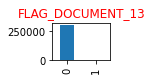

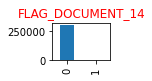

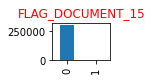

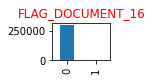

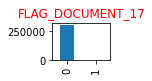

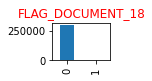

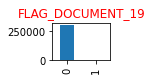

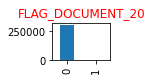

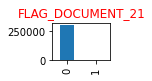

In [382]:
flag_list = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
plt.figure(figsize=(25,20))
x =1
for flag in flag_list:
    x += 1 
    plt.subplot(5,5,x)
    application_data[flag].value_counts().plot(kind = 'bar')
    plt.title(flag, color='red')
    plt.show()

**Most of the flags document are having values 0 more means those documents are submitted. Only in flag_document-3,6 and 8 little bit more but we dont need to worry about these columns. As every documents seems submitted perfectly. So, we can drop these columns now except flag-3 and flag -6 and flag-8**

In [383]:
application_data.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], inplace = True, axis = 1)

In [384]:
application_data.shape

(307233, 37)

**After dropping those Falg columns, the columns reduced to 37 now.**

In [385]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

In [386]:
categorical_data_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']
print(len(categorical_data_cols))
continious_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','Age']
print(len(continious_data_cols))

12
8


**I am taking this many variables as i can extract some details from these columns.I don't need to add Flag columns as those are document columns.**

In [387]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,55


In [388]:
application_data.info().sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

AttributeError: 'NoneType' object has no attribute 'sort_values'

# Univariate Analysis

### Categorical Univariate Analysis: 

**CODE_GENDER**

In [ ]:
print(application_data.CODE_GENDER.value_counts())

application_data.CODE_GENDER.value_counts().plot.bar()
plt.show()

**No of females are more than males**

**The list of defaulters who are now unable to pay their loan bill**

In [ ]:
target_value_1 = application_data[(application_data.TARGET == 1)]
target_value_1.head()

**List of Non-Defaulters who are paying their loan bills**

In [ ]:
target_value_0 = application_data[(application_data.TARGET == 0)]
target_value_0.head()

**Now let's see who are paying their loan bill correctly. Between men and women which gender is having good ratio of paying or defaulters.**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.CODE_GENDER,order=target_value_0.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Gender Wise",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.CODE_GENDER,order=target_value_1.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'red', loc = 'center' )
plt.title("Defaulters Gender Wise", color ='red', fontsize = 15)
plt.show()
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.show()

**Summary:** 
  * Its clearly visible now that the more no of females are paying their bills correctly compare to males.
  * Same goes for Defaulters as well. Females nos are more compare male here.

### **FLAG_OWN_CAR**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_CAR,order=target_value_0.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Flag Own Car', color = 'red', loc = 'center' )
plt.title("Non-Defaulters With/Without Car",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_CAR,order=target_value_1.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Flag Own Car', color = 'red', loc = 'center' )
plt.title("Defaulters With/Without Car", color ='red', fontsize = 15)
plt.show()

**Summary:**
* Maximum no of Non-defaulters are not having their own car.
* Maximum Defaulters also not having their own car.

### **FLAG_OWN_REALTY**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_REALTY,order=target_value_0.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Own House', color = 'red', loc = 'center' )
plt.title("Non-Defaulters With/Without a House",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_REALTY,order=target_value_1.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Own House', color = 'red', loc = 'center' )
plt.title("Defaulters With/Without a House", color ='red', fontsize = 15)
plt.show()

**Summary:**
* Most of the Non Defaulter and Defaulters are having their own house/Falt.

### **NAME_CONTRACT_TYPE**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_CONTRACT_TYPE,order=target_value_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Contract Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_CONTRACT_TYPE,order=target_value_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'red', loc = 'center' )
plt.title("Defaulters Contract Type", color ='red', fontsize = 15)
plt.show()

**Summary:**

* Nearly all opt for the cah loans contract type by both defaulter and non-defaulters.

### **NAME_INCOME_TYPE**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_INCOME_TYPE,order=target_value_0.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Income Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_INCOME_TYPE,order=target_value_1.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'red', loc = 'center' )
plt.title("Defaulters Income Type", color ='red', fontsize = 15)
plt.show()

In [ ]:
print(application_data.NAME_INCOME_TYPE.value_counts())

**Summary:**

* The Defaulters are mostly working professionals following by commercial Associates.

### **NAME_EDUCATION_TYPE**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_EDUCATION_TYPE,order=target_value_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Education Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_EDUCATION_TYPE,order=target_value_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'red', loc = 'center' )
plt.title("Defaulters Education Type", color ='red', fontsize = 15)
plt.show()

**Summary:**
* The defaulter are mostly having Secondary/Secondary special kind of education.

### **NAME_FAMILY_STATUS**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_FAMILY_STATUS,order=target_value_0.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Family Status', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Family Status",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_FAMILY_STATUS,order=target_value_1.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Family Status', color = 'red', loc = 'center' )
plt.title("Defaulters Family Status", color ='red', fontsize = 15)
plt.show()

**Summary:**
* Married people are mostly defaulters. Then less no of Single/Not Married people are defaulters.

### **NAME_HOUSING_TYPE**

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_HOUSING_TYPE,order=target_value_0.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Hosuing Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Housing Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_HOUSING_TYPE,order=target_value_1.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Housing Type', color = 'red', loc = 'center' )
plt.title("Defaulters Housing Type", color ='red', fontsize = 15)
plt.show()

**Summary:**
* Most of the Defaulters are having their own house/apartment.

### **ORGANIZATION_TYPE**

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.ORGANIZATION_TYPE,order=target_value_0.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Organization Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Organization Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.ORGANIZATION_TYPE,order=target_value_1.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel(xlabel = 'Organization Type', color = 'red', loc = 'center' )
plt.title("Defaulters Organization Type", color ='red', fontsize = 15)
plt.show()

In [ ]:
(application_data.ORGANIZATION_TYPE == 'XNA').mean()*100

**Summary:**
* Most of the Defaulters are working as Business Entry Type 3.

### **OCCUPATION_TYPE**

In [ ]:
application_data.OCCUPATION_TYPE.value_counts()

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.OCCUPATION_TYPE,order=target_value_0.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Occupation Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.OCCUPATION_TYPE,order=target_value_1.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Defaulters Occupation Type", color ='red', fontsize = 15)
plt.show()

**Summary:**
* Most of the defaulters are labours by their occupation. The labours are the one who is lower skilled people so, they are struggling with the loan bill payment and becoming defaulters.

# Univariate Analysis for Continious Variable

In [ ]:
continious_data_cols

### **AMT_INCOME_TOTAL**

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_INCOME_TOTAL, hist = False)
plt.title('Non Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_INCOME_TOTAL, hist = False, kde = True)
plt.title('Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

**Summary:**

* Most of the defaulters are earning between 1lakhs to 1.7lakhs annually. 

### **AMT_CREDIT**

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_CREDIT, hist = True, kde = True)
plt.title('Non Defaulters Credit', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Credit Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_CREDIT, hist = True, kde = True)
plt.title('Defaulters Credit', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Credit Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

**Summary:**
* We can see that the lesser the credit amount of the loan, the more chances of being a defaulter. We can see that 
  the spike is high till 0.50 which is 500000.

### **AMT_ANNUITY**

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(target_value_0.AMT_ANNUITY)
plt.title('Non Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(target_value_1.AMT_ANNUITY)
plt.title('Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

**Summary:**
* Defaulters are having loan annuity between 15000 to 30000. 

### **AMT_GOODS_PRICE**

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.kdeplot(target_value_0.AMT_GOODS_PRICE)
plt.title('Non Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.kdeplot(target_value_1.AMT_GOODS_PRICE)
plt.title('Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

**Summary:**
* Defaulters Goods price amount is largely lying between 0.2(200000) to 0.5(500000). 

### **Age**

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(target_value_0.Age)
plt.title('Non Defaulters Age', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Age', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(target_value_1.Age)
plt.title('Defaulters Age', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Age', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

**Summary:**

* The defaulters age is lying mostly between 25 to 45. Middle age people are getting defaulters more compared to other age people.

# Bivariate Analysis

In [ ]:
application_data.columns.isin(['NAME_CONTRACT_STATUS']).sum()
# application_data

In [ ]:
application_data.info()

In [ ]:
print(continious_data_cols,'\n')
print(categorical_data_cols)

**Continious variables can be seen as numerical variables. We can check the correlation between these variables.**

In [ ]:
# application_data.info()
len(categorical_data_cols)

In [ ]:
corr_for_defaulters = target_value_1[continious_data_cols]
corr_for_defaulters.info()
corr_for_defaulters

In [ ]:
corr_for_defaulters.corr()

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

**Summary:**

* I have taken the defaulter dataframe here.
* The more the correlated percentage means the high value for being a defaulter.
* 0.98% = AMT_CREDIT & AMT_GOODS_PRICE.
* 0.75% = AMT_CREDIT & AMT_ANNUITY.
* 0.75% = AMT_GOODS_PRICE & AMT_ANNUITY.
* 0.58% = Age & DAYS_EMPLOYED

**The same way we can check for the non-defaulters**

In [ ]:
corr_for_non_defaulters = target_value_0[continious_data_cols]
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_non_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

**Summary:**
* I have taken the Non-defaulter dataframe here.
* The more the correlated percentage means the high value for being a Non-defaulter.
* 0.99% = AMT_CREDIT & AMT_GOODS_PRICE.
* 0.77% = AMT_CREDIT & AMT_ANNUITY.
* 0.77% = AMT_GOODS_PRICE & AMT_ANNUITY.
* 0.63% = Age & DAYS_EMPLOYED

**We can come to conclusion that there is a similarity between columns when it comes to default and non-default data correlation. The column relation which are hsowing higher percentage of correlation in Non-defaulters are the one  showing in defaulters correlation.**

### 1. **AMT_CREDIT & AMT_INCOME_TOTAL & CODE_GENDER**

In [ ]:
# We will do scatter plot analysis

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(x = target_value_1.AMT_CREDIT,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x = target_value_0.AMT_CREDIT,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.show()

**Summary:**

* For **Non-Defaulters:** The values are evenly distributed AMT_CRETI and AMT_INCOME_TOTAL. There no distinguish between Male and female. its looks like all are having same ratio in this plot. So, Its hard to figure it out here.
* For **Defaulters:** There are more congested values in initial or lower areas of both AMT_CREDIT and AMT_INCOME_TOTAL. With the Income the LOAN value also increses.

### **2. Numericals to Numericals Analysis**

In [ ]:
# Pair plots between variables and checking for Non-Defaulters

sns.pairplot(target_value_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

In [ ]:
#Pair Plots for Defaulters

sns.pairplot(target_value_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

### **3. EDUCATION_TYPE & CODE_GENDER & AMT_INCOME_TOTAL**

In [ ]:
# We will do scatter plot else we can do line plot as well for this analysis

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = target_value_1.NAME_EDUCATION_TYPE,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = target_value_0.NAME_EDUCATION_TYPE,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

**Summary:**

* **Defaulters:** Female Academic Degree holders are earning more but still there in defaulter list more. Where as not s single Academic male holders are in defaulter list.
* But for rest of the education type we can see that males are earning more as well being the more defaulters.

* **Non Defaulters:** Here also Female Academic degree holders are more and they are in high no when it comes to non defaulters. Nearly same amount non defaulter are there for guys who studied Higher education. Applied to both male and female. Female in all educational aspects are more non-defaulters than male.

### **4.NAME_CONTRACT_TYPE & CODE_GENDER**

In [ ]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')

In [ ]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER', aggfunc = 'mean').plot.bar(figsize = (15,7))
plt.title('Contract Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

**Summary:**

* cashloans by males are more comapred to female and they are defaulters as well.
* Revolving loans are also taken by male more and they are most defaulters.

### **5.NAME_INCOME_TYPE & GENDER & TARGET**

In [ ]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')

In [ ]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean').plot.bar(figsize=(15,7))
plt.title('Income Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

**Summary:**

* We can see that Unemployed people are more defaulters in both male and female case.
* Males are more unemployed than female.
* Maternity leave females are also in higher no in defaulters list. 
* Male nos are more compare to female in defaulters list.

# **PREVIOUS DATSET ANALYSIS::**

# Data Loading and Cleaning

In [ ]:
previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

In [ ]:
previous_data.shape

In [ ]:
previous_data.info()

In [ ]:
previous_data.describe()

In [ ]:
null_previous_data = previous_data.isnull().mean() * 100

In [ ]:
null_previous_data.sort_values(ascending = False)

**Now as we know, we can drop those columns which are having more than 40% of null values**

In [ ]:
list_of_columns_to_be_drop = null_previous_data[null_previous_data.values >=40.00].index.tolist()

In [ ]:
previous_data.drop(list_of_columns_to_be_drop, inplace = True, axis = 1)

In [ ]:
previous_data.head()

In [ ]:
previous_data.shape

**Handling Negative values**

In [ ]:
previous_data.columns

In [ ]:
previous_data.isnull().mean()*100

**Dropping the irrelevants columns**

In [ ]:
column_list = ['FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START']
previous_data.drop(column_list, inplace = True, axis =1)
print(previous_data.columns)

In [ ]:
previous_data.isna().sum()

In [ ]:
previous_data.NAME_CONTRACT_TYPE.value_counts()

**Let's try to remove all the XNA present in all columns and replace them with Null value**

In [ ]:
previous_data = previous_data.replace('XNA',np.NaN)
previous_data = previous_data.replace('XPA', np.NaN)

In [ ]:
previous_data.NAME_CONTRACT_TYPE.value_counts()

**Importing Missing Values**

In [ ]:
(previous_data.isnull().mean()*100).sort_values(ascending = False)

**The Null Percentage increased due to i replaced the XAP and XNA values with NAN value.**

In [ ]:
# Drop those columns which are having null values above 30%

column_list = ['NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE']
previous_data.drop(column_list, inplace = True, axis =1)
print(previous_data.columns)

In [ ]:
(previous_data.isnull().mean()*100).sort_values(ascending = False)

In [ ]:
total_null_rows = len(previous_data[((np.isnan(previous_data['AMT_ANNUITY']) & np.isnan(previous_data['AMT_GOODS_PRICE']) & np.isnan(previous_data['CNT_PAYMENT'])))])
total_null_rows

In [ ]:
previous_data.shape

**Total ROWS** = 1670214<br>
**Null Rows** = 333855

We can't just put the mean, median or mode values in these columns as its going to imbalance the whole calculation. This no is not big compare to the total rows. So, we can drop these rows.

In [ ]:
previous_data = previous_data[(~(np.isnan(previous_data['AMT_ANNUITY']) & np.isnan(previous_data['AMT_GOODS_PRICE']) & np.isnan(previous_data['CNT_PAYMENT'])))]
previous_data.shape

In [ ]:
previous_data.isnull().mean() *100

#### **AMT_ANUITY**

In [ ]:
previous_data.AMT_ANNUITY.describe().apply(lambda p: '%.2f' % p)

In [ ]:
sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

In [ ]:
Annuity_null_mean = previous_data.AMT_ANNUITY.mean()

In [ ]:
previous_data.AMT_ANNUITY = previous_data.AMT_ANNUITY.fillna(Annuity_null_mean)
print(previous_data.AMT_ANNUITY.isnull().mean()*100)

In [ ]:
#remove Outliers now
q1=previous_data["AMT_ANNUITY"].describe()["25%"]
q3=previous_data["AMT_ANNUITY"].describe()["75%"]
iqr=q3-q1 #interquartile range
upper_bound=q3+1.5*iqr
previous_data["AMT_ANNUITY"]=np.where(previous_data["AMT_ANNUITY"]>upper_bound,upper_bound,previous_data["AMT_ANNUITY"])

In [ ]:
sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

In [ ]:
previous_data.isnull().mean()*100

In [ ]:
print(previous_data['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p))

In [ ]:
previous_data = previous_data[~np.isnan(previous_data['AMT_GOODS_PRICE'])]
# We can do this with drop method as well. 

In [ ]:
print(previous_data['AMT_CREDIT'].describe().apply(lambda p: '%.2f' % p))

In [ ]:
previous_data = previous_data[~np.isnan(previous_data['AMT_CREDIT'])]

In [ ]:
previous_data.shape

In [ ]:
(previous_data.isnull().mean()*100).sort_values(ascending = False)

In [ ]:
print(previous_data['CNT_PAYMENT'].describe().apply(lambda p: '%.2f' % p))

In [ ]:
previous_data.CNT_PAYMENT = previous_data.CNT_PAYMENT.fillna(previous_data.CNT_PAYMENT.mean()) 

In [ ]:
previous_data.CNT_PAYMENT.isnull().mean()*100

In [ ]:
previous_data.isnull().mean()*100

#### **REMOVE OUTLIERS USING LOOP**

In [ ]:
# I have imputed and removed some of the columns which i want to analyse here.

columns_list = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION']

for column in columns_list:
    
    #remove Outliers now
    q1=previous_data[column].describe()["25%"]
    q3=previous_data[column].describe()["75%"]
    iqr=q3-q1 #interquartile range
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    previous_data[column]=np.where(previous_data[column]>upper_bound,upper_bound,previous_data[column])
    previous_data[column]=np.where(previous_data[column]<lower_bound,lower_bound,previous_data[column])


In [ ]:
previous_data.shape

**After removal of outliers we can see that the no of rows are now reduced more.**

# Univariate Analysis

In [393]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [394]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284699 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1284699 non-null  int64  
 1   SK_ID_CURR            1284699 non-null  int64  
 2   NAME_CONTRACT_TYPE    1284699 non-null  object 
 3   AMT_ANNUITY           1284699 non-null  float64
 4   AMT_APPLICATION       1284699 non-null  float64
 5   AMT_CREDIT            1284699 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1284699 non-null  object 
 8   DAYS_DECISION         1284699 non-null  int64  
 9   CODE_REJECT_REASON    1280603 non-null  object 
 10  NAME_CLIENT_TYPE      1283763 non-null  object 
 11  NAME_PORTFOLIO        1246324 non-null  object 
 12  CHANNEL_TYPE          1284699 non-null  object 
 13  SELLERPLACE_AREA      1284699 non-null  int64  
 14  CNT_PAYMENT           1284699 non-

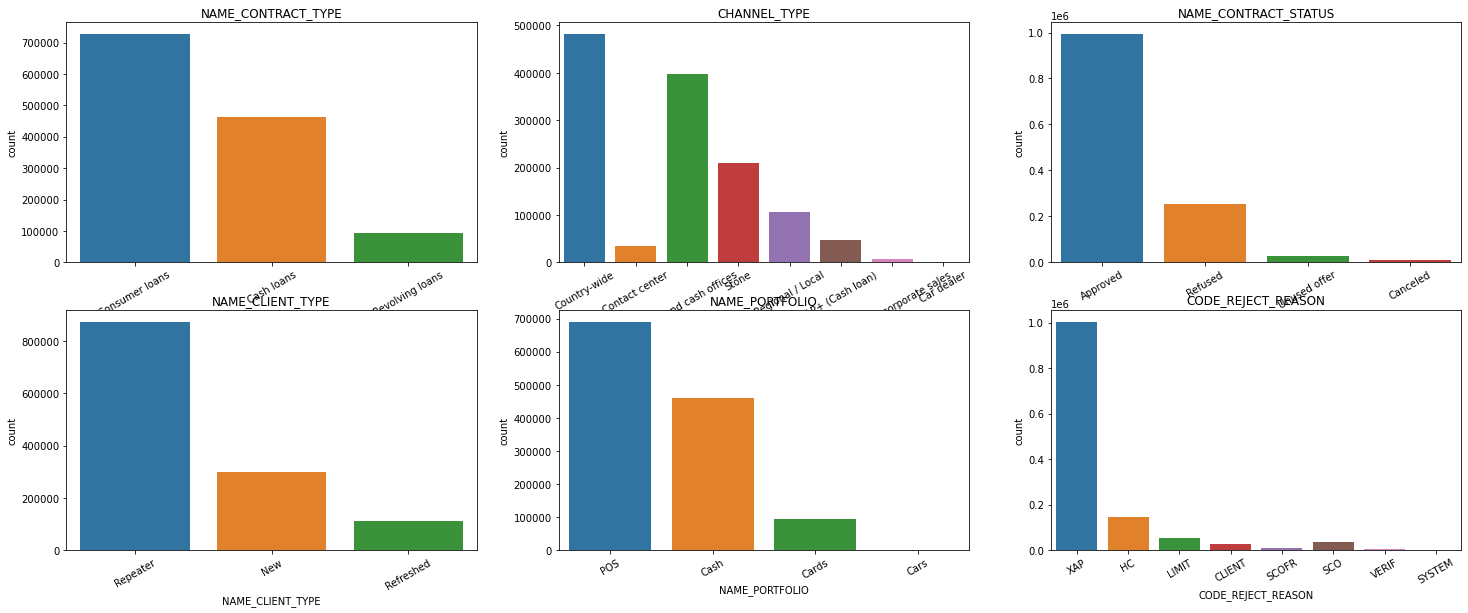

In [395]:
column_list = ['NAME_CONTRACT_TYPE', 'CHANNEL_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', "CODE_REJECT_REASON" ]

x = 0

plt.figure(figsize = (25,15))

for column in column_list:
    
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column, data = previous_data)
    plt.xticks(rotation = 30)
    plt.title(column)
    

**Summary:**

* NAME_CONTRACT_TYPE: More COnsumer Loans and Less Revolving Loans
* CHANNEL_TYPE: Except Contact center, AP+CashLoans and Car dealers all other are high in numbers.
* NAME_CONTRACT_TYPE: Mostly approved, very less Refused and very few loans are cancelled.
* NAME_CLIENT_TYPE: Most of the Clients are are repater client.
* NAME_PORTFOLIO: POS are in huge numbers compare to Cash and cards.

In [396]:
previous_data.DAYS_DECISION

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1284699, dtype: int64

In [ ]:
previous_data.DAYS_DECISION = previous_data.DAYS_DECISION.astype('int')
print(previous_data.DAYS_DECISION.abs())

In [397]:
previous_data.DAYS_DECISION = previous_data.DAYS_DECISION.abs()
print(previous_data.DAYS_DECISION)

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1284699, dtype: int64


**These are in Days, I can convert this into Months or Into Years**

In [398]:
previous_data['MONTHS'] = round(previous_data.DAYS_DECISION/30)
previous_data.drop(["DAYS_DECISION"], axis =1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,MONTHS
0,2030495,271877,Consumer loans,1730.4300,17145.0,17145.0,17145.0,Approved,XAP,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest,2.0
1,2802425,108129,Cash loans,25188.6150,607500.0,679671.0,607500.0,Approved,XAP,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low,5.0
2,2523466,122040,Cash loans,15060.7350,112500.0,136444.5,112500.0,Approved,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high,10.0
3,2819243,176158,Cash loans,40912.3575,450000.0,470790.0,450000.0,Approved,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle,17.0
4,1784265,202054,Cash loans,31924.3950,337500.0,404055.0,337500.0,Refused,HC,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.2900,267295.5,311400.0,267295.5,Approved,XAP,Refreshed,POS,Stone,43,30.0,low_normal,POS industry with interest,18.0
1670210,2357031,334635,Consumer loans,6622.0200,87750.0,64291.5,87750.0,Approved,XAP,New,POS,Stone,43,12.0,middle,POS industry with interest,56.0
1670211,2659632,249544,Consumer loans,11520.8550,105237.0,102523.5,105237.0,Approved,XAP,Repeater,POS,Country-wide,1370,10.0,low_normal,POS household with interest,50.0
1670212,2785582,400317,Cash loans,18821.5200,180000.0,191880.0,180000.0,Approved,XAP,Repeater,Cash,AP+ (Cash loan),-1,12.0,low_normal,Cash X-Sell: low,40.0


In [399]:
previous_data['MONTHS'] = round(previous_data.DAYS_DECISION/30)
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,MONTHS
0,2030495,271877,Consumer loans,1730.4300,17145.0,17145.0,17145.0,Approved,73,XAP,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest,2.0
1,2802425,108129,Cash loans,25188.6150,607500.0,679671.0,607500.0,Approved,164,XAP,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low,5.0
2,2523466,122040,Cash loans,15060.7350,112500.0,136444.5,112500.0,Approved,301,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high,10.0
3,2819243,176158,Cash loans,40912.3575,450000.0,470790.0,450000.0,Approved,512,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle,17.0
4,1784265,202054,Cash loans,31924.3950,337500.0,404055.0,337500.0,Refused,781,HC,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high,26.0


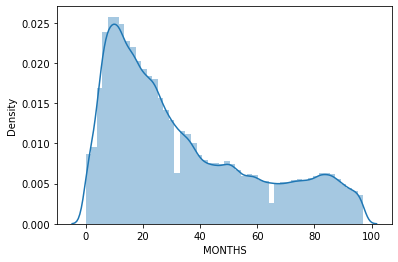

In [400]:
sns.distplot(previous_data['MONTHS'])
plt.show()

**Most of the Decisions has been taken between 15 to 30months.**

# MERGING APPLICATION AND PREVIOUS DATA

In [401]:
application_cols_list = application_data.columns.to_list()
application_cols_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Age']

**I will choose those columns which i want to work with from here. But i have to take SK_ID_CURR column as that is the common column between these two Dataframe.**


In [402]:

application_cols_list = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2','EXT_SOURCE_3']
application_data_to_merge = application_data[application_cols_list]

In [403]:
previous_cols_list = previous_data.columns.to_list()
previous_cols_list

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'MONTHS']

**I will choose those columns which i want to work with from here. But i have to take SK_ID_CURR column as that is the common column between these two Dataframe.**

In [404]:

previous_cols_list = ["SK_ID_CURR",'AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS', 'MONTHS']
previous_data_to_merge = previous_data[previous_cols_list]

In [407]:
merging_data = pd.merge(application_data_to_merge, previous_data_to_merge, on ='SK_ID_CURR', how = 'left')
merging_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,MONTHS
0,100002,1,M,Secondary / secondary special,Single / not married,26,202500.0,0.262949,0.139376,179055.0,179055.0,179055.0,9251.7750,24.0,Consumer loans,Approved,20.0
1,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,1035882.0,900000.0,900000.0,40912.3575,12.0,Cash loans,Approved,25.0
2,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,348637.5,337500.0,337500.0,40912.3575,6.0,Consumer loans,Approved,28.0
3,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,68053.5,68809.5,68809.5,6737.3100,12.0,Consumer loans,Approved,78.0
4,100004,0,M,Secondary / secondary special,Single / not married,52,67500.0,0.555912,0.729567,20106.0,24282.0,24282.0,5357.2500,4.0,Consumer loans,Approved,27.0


In [408]:
merging_data.shape

(1110636, 17)

In [409]:
merging_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110636 entries, 0 to 1110635
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1110636 non-null  int64  
 1   TARGET                1110636 non-null  int64  
 2   CODE_GENDER           1110636 non-null  object 
 3   NAME_EDUCATION_TYPE   1110636 non-null  object 
 4   NAME_FAMILY_STATUS    1110636 non-null  object 
 5   Age                   1110636 non-null  int32  
 6   AMT_INCOME_TOTAL      1110636 non-null  float64
 7   EXT_SOURCE_2          1110636 non-null  float64
 8   EXT_SOURCE_3          1110636 non-null  float64
 9   AMT_CREDIT            1093218 non-null  float64
 10  AMT_APPLICATION       1093218 non-null  float64
 11  AMT_GOODS_PRICE       1093218 non-null  float64
 12  AMT_ANNUITY           1093218 non-null  float64
 13  CNT_PAYMENT           1093218 non-null  float64
 14  NAME_CONTRACT_TYPE    1093218 non-

In [410]:
merging_data.TARGET

0          1
1          0
2          0
3          0
4          0
          ..
1110631    0
1110632    0
1110633    0
1110634    0
1110635    0
Name: TARGET, Length: 1110636, dtype: int64

**Percentage of credit with respect to the no of application**

In [411]:
merging_data['PERCENT_CREDIT'] = round(merging_data['AMT_CREDIT'] // merging_data['AMT_APPLICATION'])

In [412]:
merging_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,MONTHS,PERCENT_CREDIT
0,100002,1,M,Secondary / secondary special,Single / not married,26,202500.0,0.262949,0.139376,179055.0,179055.0,179055.0,9251.7750,24.0,Consumer loans,Approved,20.0,1.0
1,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,1035882.0,900000.0,900000.0,40912.3575,12.0,Cash loans,Approved,25.0,1.0
2,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,348637.5,337500.0,337500.0,40912.3575,6.0,Consumer loans,Approved,28.0,1.0
3,100003,0,F,Higher education,Married,46,270000.0,0.622246,0.510853,68053.5,68809.5,68809.5,6737.3100,12.0,Consumer loans,Approved,78.0,0.0
4,100004,0,M,Secondary / secondary special,Single / not married,52,67500.0,0.555912,0.729567,20106.0,24282.0,24282.0,5357.2500,4.0,Consumer loans,Approved,27.0,0.0


# UNIVARIATE ANALYSIS

**NAME_CONTRACT_TYPE**

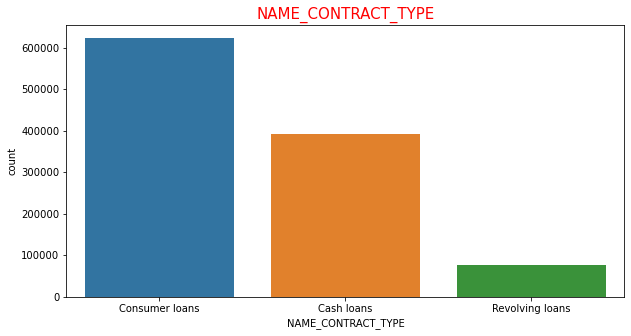

In [427]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_CONTRACT_TYPE)
plt.title('NAME_CONTRACT_TYPE', color = 'red', fontsize =15)
plt.show()

**NAME_CONTRACT_STATUS**

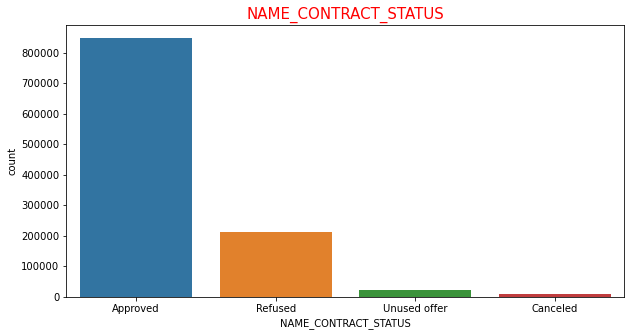

In [430]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_CONTRACT_STATUS)
plt.title('NAME_CONTRACT_STATUS', color = 'red', fontsize =15)
plt.show()

**NAME_EDUCATION_TYPE**

In [ ]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_EDUCATION_TYPE)
plt.title('NAME_EDUCATION_TYPE', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

### **Continious Univariate Analysis**

**CREDIT LOAN AMOUNT**

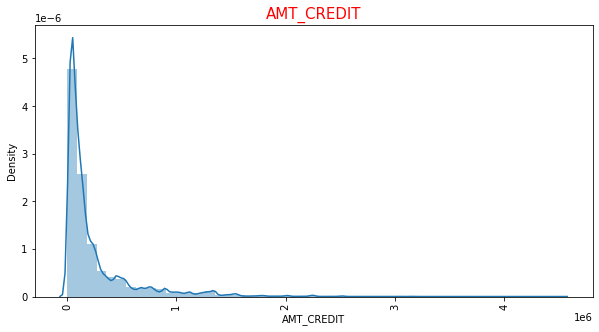

In [428]:
plt.figure(figsize = (10,5))

sns.distplot(merging_data.AMT_CREDIT)
plt.title('AMT_CREDIT', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

**Mostle Credited amount has been distributed between 50k to 1.5lakhs but also there is a 6lkahs one.**

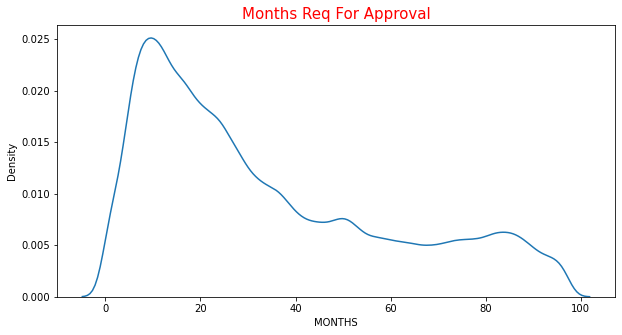

In [429]:
plt.figure(figsize=(10,5))
sns.distplot(merging_data['MONTHS'],hist=False)
plt.title('Months Req For Approval', color = 'red', fontsize = 15)
plt.show()

**Most of the decisions has been taken by 15 to 30 months. Some are taken 100months which is highest time taken to make any decision for the request.**

# **Bivariate Analysis**

In [ ]:
merging_data_corr = merging_data[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'PERCENT_CREDIT', 'MONTHS']]
merging_data_corr.head()

In [ ]:
merging_data_corr.corr()

In [ ]:
plt.figure(figsize = (13,7))
sns.heatmap(merging_data_corr.corr(), cmap = 'RdYlGn_r', annot = True )
plt.show()

**Summary:**

* **AMT_CREDIT & AMT_APPLICATION :** Highly correlated, nearly 99%.
* **AMT_CREDIT & AMT_ANNUITY :** Highly Correlated, nearly 86%.
* **AMT_ANNUITY & AMT_APPLICATION :** Highly correlated, nearly 86%.

In [414]:
column_lists = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

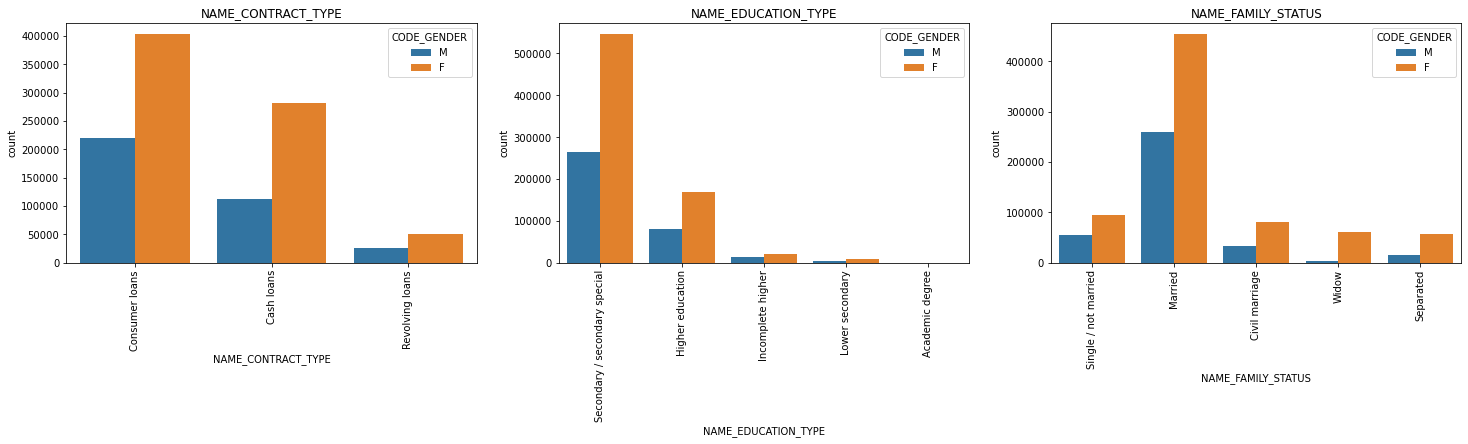

In [415]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'CODE_GENDER',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)
    

**Summary:**

* Consumer loans are more taken by Female than Male.
* Secondary/Secondary Special Education type of female are more than male.
* More Married female member are taken loans compare to male.

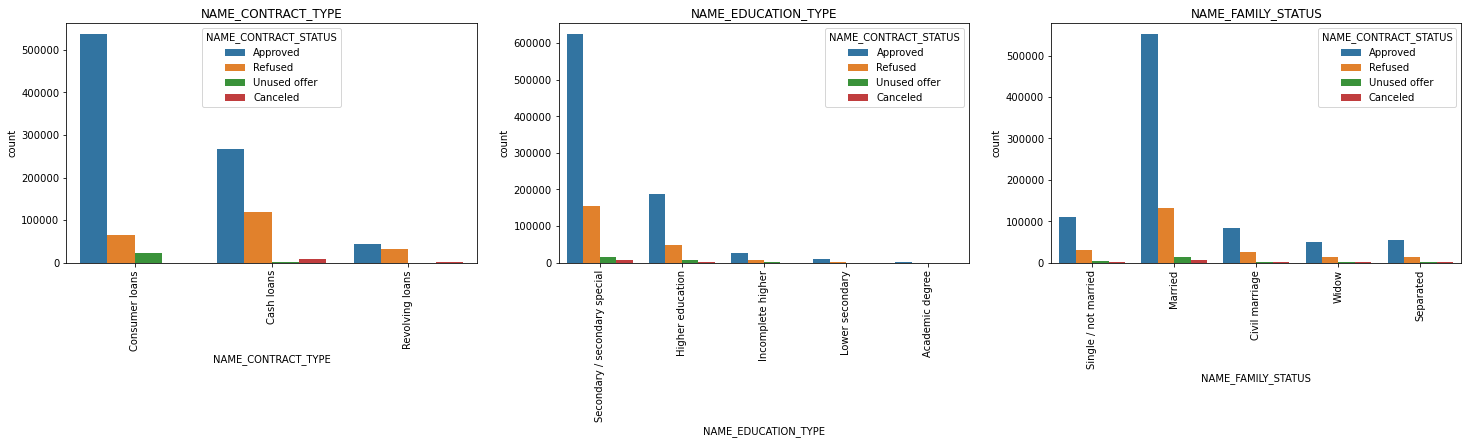

In [416]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'NAME_CONTRACT_STATUS',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)

**Summary:**

* Highest no of contract got approval in consumer Loans.
* Highest no of contract got approval in secondary /secondary special education type.
* Highest no of contract got approved to those who are married.

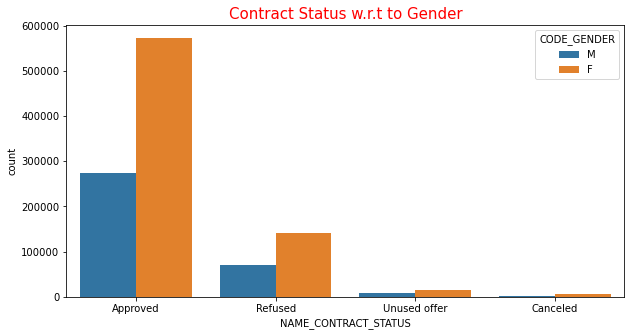

In [420]:
plt.figure(figsize = (10,5))

sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", data = merging_data)
plt.title('Contract Status w.r.t to Gender', color = 'red', fontsize = '15')
plt.show()

**Summary:**

* Female contracts got approved more compared to male. 
* Female contracts also got refused more compare to male but that is nearly negligible and Less in numbers compare to approval.

In [ ]:
merging_data.columns

In [ ]:
merge_target_value_0 = merging_data[(merging_data.TARGET == 0)]
merge_target_value_0.head()

In [ ]:
merge_target_value_1 = merging_data[(merging_data.TARGET == 1)]
merge_target_value_1.head()

# Bivariate using Target Variable:

### **DEFAULTERS CORRELATION**

In [ ]:
cols_list = ['Age', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE']

In [ ]:
merge_corr_for_defaulters = merge_target_value_1[cols_list]
merge_corr_for_defaulters.head()

In [ ]:
merge_corr_for_defaulters.corr()

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(merge_corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_CONTRACT_TYPE,hue = merge_target_value_1.CODE_GENDER, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_FAMILY_STATUS,hue = merge_target_value_1.CODE_GENDER, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_CONTRACT_STATUS,hue = merge_target_value_1.NAME_FAMILY_STATUS, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_EDUCATION_TYPE,data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(x = merge_target_value_1.AMT_CREDIT)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# **CONCLUSION**

* **In Contract type, female with consumer loans type are in more no of defaulters.**
* **Married people are struggling to pay the loan bill compared to single and separated people. More no of approved people are married. From next time onwards we need to give loan to those who are either single or divorced.**
* **Secondary/ secondary special people with education are struggling to pay their loan bill and becoming defaulters.**
* **Lower credit amount people else really higher credit amount people are having high chance to becoming a defaulters.**
* **Female Gender are more likely to not face payment difficulties then the male and hence it is recommended to approve more loans of Female Gender than the male gender at the same Female are High in number than who face difficulties than males.**
* **The Repeater applicant has High chance of non-Defaulting and also has high chance of defaulting when compared to new applicants.**


<h4 style = 'color: Blue'> If you like this Notebook, Give it a Upvote.<br>
    Follow me on Github and Twitter.<br>
    Happy Kaggling!!!!</h4>